In [87]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [88]:
#Create path
path= r'/Users/shantamaraj/Desktop/INSTACART DATA/Prepared Data'

In [89]:
#Import pickle file from previous exercise
ords_prods_merge= pd.read_pickle(os.path.join(path, "orders_products_merged_grouped_4.8.pkl"))

## Create a bar chart

<Axes: xlabel='orders_day_of_week'>

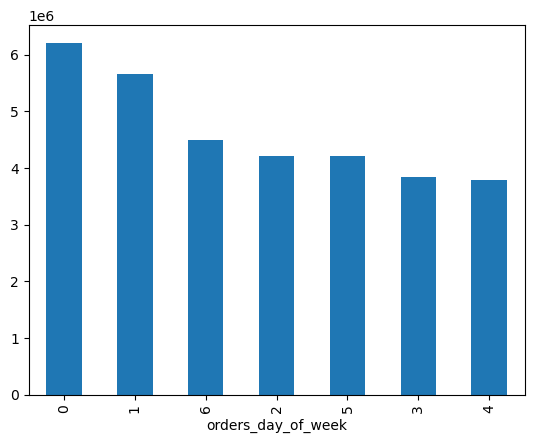

In [90]:
#Plotting bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

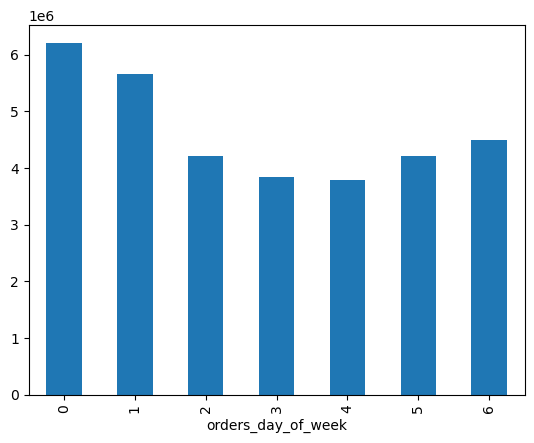

In [91]:
#indexing by order of days of week
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

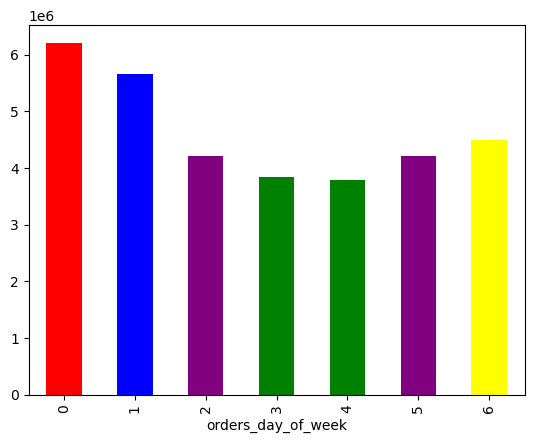

In [92]:
#adding colors
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['red','blue','purple','green','green','purple','yellow'])

In [93]:
#saving image
bar.figure.savefig(os.path.join(path, 'bar_orders_dow.png'))

## Histograms and Scatterplots

<Axes: ylabel='Frequency'>

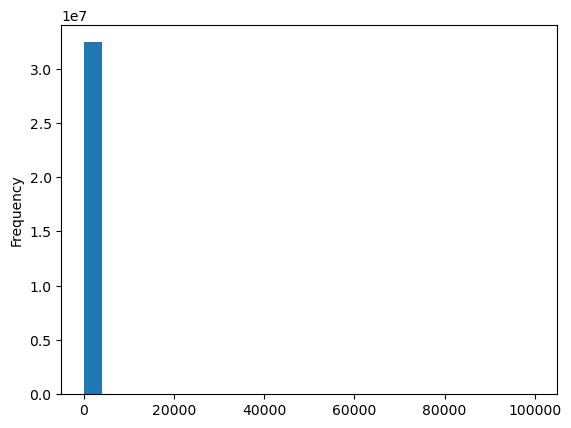

In [16]:
#creating histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

In [18]:
#describing 'prices'
ords_prods_merge['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

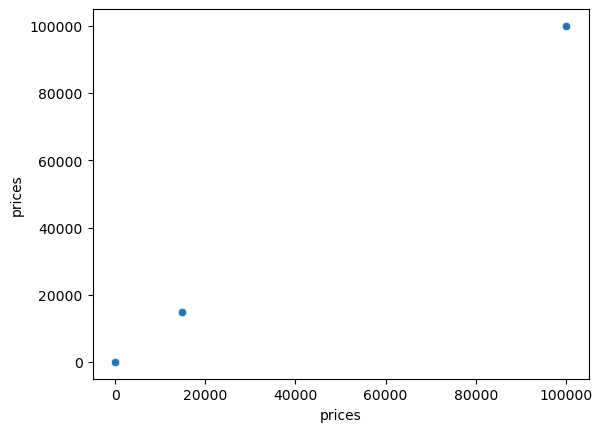

In [20]:
#creating scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [23]:
#finding prices over $100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,updated_busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since,order_frequency_flag
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Fewest orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Fewest orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
16532,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
16538,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
53710,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32349781,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Fewest orders,25,Regular customer,349.193678,High spender,6.0,Frequent customer
32377014,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Fewest orders,25,Regular customer,169.226630,High spender,12.5,Regular customer
32377024,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Least busy,Slowest days,Most orders,25,Regular customer,169.226630,High spender,12.5,Regular customer
32409856,1916142,206049,1,2,17,NaN,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,5,New customer,938.031250,High spender,7.0,Frequent customer


In [25]:
#assigning null values to outliers
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [27]:
#finding max value in prices
ords_prods_merge['prices'].max()

25.0

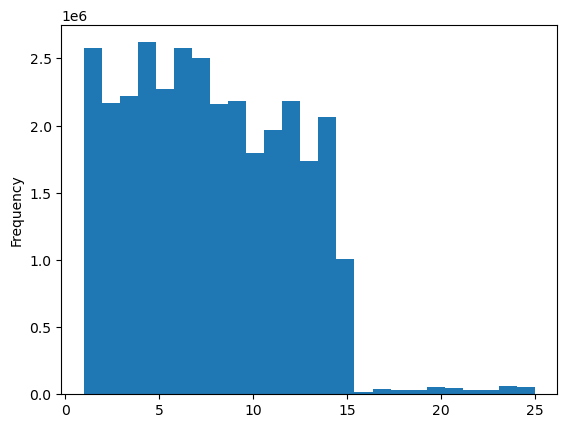

In [28]:
#creating histogram
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

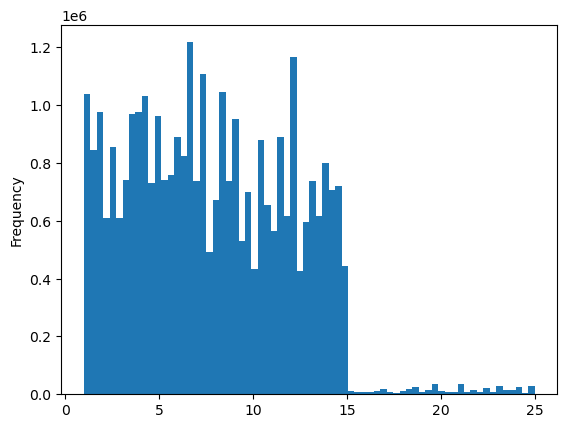

In [29]:
#for more granularity
hist2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [30]:
#exporting histogram and saving image
hist.figure.savefig(os.path.join(path, 'hist_orders_prices.png'))

## Sampling

In [31]:
#setting the seed
np.random.seed(4)

In [33]:
#assigning 'dev'
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [34]:
#split into 'big' and 'small'
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [37]:
#check results
len(ords_prods_merge)

32434212

In [38]:
len(big) + len(small)

32434212

In [39]:
#Create a dataframe using only the necessary columns
df = small[['orders_day_of_week','prices']]

In [94]:
df.head()

,orders_day_of_week,prices
0,2,9.0
2,2,4.4
3,2,4.7
6,3,3.0
10,3,4.0


## Line Chart

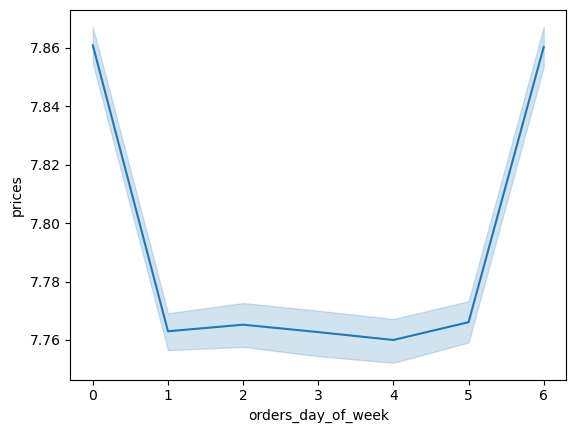

In [41]:
#Create a line chart
line = sns.lineplot(data = df, x = 'orders_day_of_week',y = 'prices')

In [97]:
#creating smaller subset of main dataframe using only relevant columns
df_2 = df[['orders_day_of_week', 'prices']]

In [ ]:
#creating another line chart from entire dataframe, to compare
line_2 = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')